# MSWEP

imports

In [1]:
import xarray as xr
import intake

Open the catalogue and access the data at once

In [2]:
cat = intake.open_catalog('https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml')\
                          ['dkrz']['dkrz_eerie_disk']['dkrz_eerie_observations']

In [3]:
mswep = cat['MSWEP']['past']#['ebaf-toa42']#['woa18_2005_2017']
print(list(mswep))

['monthly', 'daily', '3hourly']


In [4]:
data=mswep['daily'].to_dask()

In [5]:
data['precipitation']

<xarray.DataArray 'precipitation' (time: 15339, lat: 1800, lon: 3600)>
dask.array<concatenate, shape=(15339, 1800, 3600), dtype=float32, chunksize=(23, 113, 450), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * time     (time) datetime64[ns] 1979-01-02 1979-01-03 ... 2020-12-30
Attributes:
    units:    mm d-1

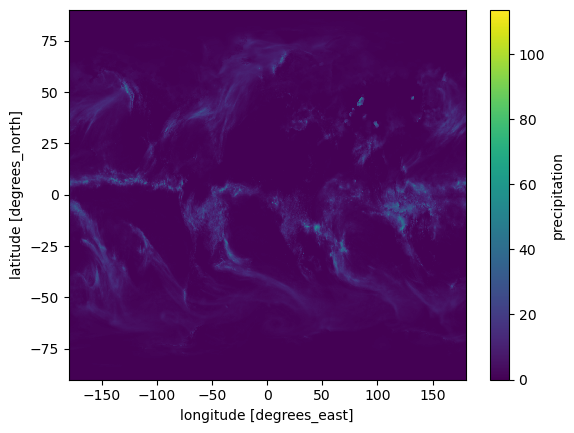

In [21]:
data['precipitation'].sel(time=slice('2020-01-01', '2020-01-05')).mean(dim='time').plot()

In [44]:
from dask.distributed import Client
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
dask.config.set({'temporary_directory': '/scratch/a/a270088/dask/'})
# client = Client(n_workers=5, threads_per_worker=1, memory_limit='50GB')
client = Client(n_workers=20, threads_per_worker=1, memory_limit='10GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Workers: 20
Total threads: 20,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41191,Workers: 20
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Total threads: 20
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:41285,Total threads: 1
Dashboard: /user/a270088/levante-spawner-preset//proxy/34801/status,Memory: 9.31 GiB
Nanny: tcp://127.0.0.1:35193,


In [45]:
mean = data['precipitation'].sel(time=slice('2010', '2020')).mean(dim='time').compute()

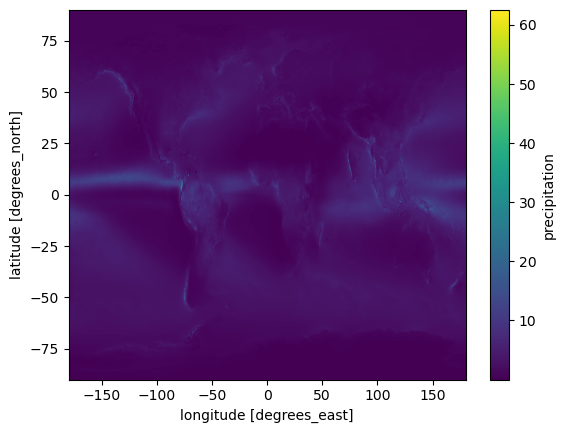

In [47]:
mean.plot()